In [616]:
import torch

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат.

In [617]:
class Neuron:
  def __init__(self, weights, bias):
    # <создать атрибуты объекта weights и bias>
    self.weights=weights
    self.bias=bias

  def forward(self, inputs):
    y_pred = torch.matmul(self.weights,inputs)+self.bias
    return y_pred# <реализовать логику нейрона>


In [618]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [619]:
N = Neuron(weights,bias)
y = N.forward(inputs)
y

tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат.

In [620]:
class Linear:
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases

  def forward(self, inputs):
    y_pred = torch.matmul(self.weights,inputs)+self.biases
    return y_pred# <реализовать логику слоя>

In [621]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]])

biases = torch.tensor([3.14, 2.71, 7.2])

In [622]:
weights.size(), inputs.size()

(torch.Size([3, 4]), torch.Size([4]))

In [623]:
L = Linear(weights,biases)
y = L.forward(inputs)
y

tensor([ 4.8400,  0.1700, 10.3900])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [624]:
class Linear:
  def __init__(self, weights, biases):
    self.weights = weights
    self.biases = biases
    # self.batch_size = batch_size

  def forward(self, inputs):
    y_pred = torch.matmul(self.weights,inputs)+self.biases
    return y_pred# <реализовать логику слоя>

In [625]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [626]:
L = Linear(weights,biases)
y = L.forward(inputs.T)
y

tensor([[ 3.7900,  5.7100,  6.1000],
        [ 1.3500, -2.1000,  5.2510],
        [ 5.0250,  2.4100,  6.7260]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [627]:
import torch

class Linear:
    def __init__(self, n_features, n_neurons):
        self.w = torch.randn(n_features, n_neurons)
        self.b = torch.randn(n_neurons)

    def forward(self, inputs):
        y_pred = torch.matmul(inputs, self.w) + self.b
        return y_pred

inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

L = Linear(inputs.size(1), 3)

y = L.forward(inputs)
print(y)


tensor([[ 2.5382, -3.4252,  2.7093],
        [ 7.1457, -3.4239,  0.4892],
        [-1.3264,  4.3794, -0.5290]])


2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [628]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [629]:
import torch

class Linear:
    def __init__(self, n_features, n_neurons):
        self.w = torch.randn(n_features, n_neurons)
        self.b = torch.randn(n_neurons)

    def forward(self, inputs):
        y_pred = torch.matmul(inputs, self.w) + self.b
        return y_pred

# Создаем два полносвязных слоя
layer1 = Linear(inputs.size(1), 5)  # Произвольное количество нейронов в первом слое (5)
layer2 = Linear(5, 7)  # Количество нейронов во втором слое выбрано так, чтобы результат был (3x7)

# Пропускаем матрицу inputs через первый слой
output1 = layer1.forward(inputs)

# Пропускаем результат через второй слой
output2 = layer2.forward(output1)

print(output2)


tensor([[ -0.8245,   8.4672,  -8.3084, -14.3719,   6.8622,   8.3467,  -7.3600],
        [ 15.5097,  14.2156,  -6.2961, -11.4717,  23.8163,  14.6166,  -1.1873],
        [  7.5152,   8.7917,  -3.9650,  -7.4989,  11.6623,  11.2467,  -1.5650]])


## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [630]:
import torch
from torch import nn
class ReLU:
    def forward(self, inputs):
        return torch.max(torch.zeros_like(inputs), inputs)

# Создаем матрицу размера (4, 3) со значениями из стандартного нормального распределения
random_matrix = torch.randn(4, 3)

# Применяем функцию активации ReLU к матрице
relu_layer = ReLU()
output_matrix = relu_layer.forward(random_matrix)

print(output_matrix)


tensor([[1.0134, 0.4275, 0.0000],
        [0.0887, 0.4193, 0.0000],
        [1.0644, 0.6515, 1.4790],
        [0.0000, 0.6249, 0.0000]])


In [631]:
# m = nn.ReLU()
# input = torch.randn(2).unsqueeze(0)
# output = torch.cat((m(input), m(-input)))

2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [632]:
class Softmax:
  def forward(self, inputs):
    exp_inputs = torch.exp(inputs - torch.max(inputs, dim=1, keepdim=True).values)
    softmax_values = exp_inputs / exp_inputs.sum(dim=1, keepdim=True)
    return softmax_values

# Создаем матрицу размера (4, 3) со значениями из стандартного нормального распределения
random_matrix = torch.randn(4, 3)

# Применяем функцию активации ReLU к матрице
softmax_layer = Softmax()
output_matrix = softmax_layer.forward(random_matrix)

print(output_matrix)


tensor([[0.5462, 0.1175, 0.3363],
        [0.3659, 0.5351, 0.0990],
        [0.4812, 0.2021, 0.3167],
        [0.0889, 0.4831, 0.4280]])


In [633]:
random_matrix.softmax(1)

tensor([[0.5462, 0.1175, 0.3363],
        [0.3659, 0.5351, 0.0990],
        [0.4812, 0.2021, 0.3167],
        [0.0889, 0.4831, 0.4280]])

2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [634]:
class ELU:
  def __init__(self, alpha):
    self.alpha = alpha

  def forward(self, inputs):
    # <реализовать логику ReLU>
    elu_values = torch.where(inputs >= 0, inputs, self.alpha*(torch.exp(inputs)-1))
    return elu_values

# Создаем матрицу размера (4, 3) со значениями из стандартного нормального распределения
random_matrix = torch.randn(4, 3)

# Применяем функцию активации ReLU к матрице
elu_layer = ELU(1)
output_matrix = elu_layer.forward(random_matrix)

print(output_matrix)

tensor([[-0.6152, -0.0463,  1.1810],
        [ 0.0863, -0.3404, -0.3413],
        [-0.1623,  0.2632,  1.0197],
        [ 0.0338,  0.2102, -0.3907]])


## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [635]:
class MSELoss:
    def forward(self, y_pred, y_true):
        output = torch.mean((y_pred - y_true) ** 2)
        return output
    def backward(self, y_pred, y_true):
        self.dinput = 2 * (y_pred - y_true)

In [636]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [637]:
class Linear:
    def __init__(self, n_neurons: torch.Tensor, n_features: torch.Tensor):
        self.weights = torch.randn(n_neurons, n_features)
        self.bias = torch.randn(n_neurons)

    def forward(self, inputs):
        y_pred = (inputs @ self.weights.T) + self.bias
        return y_pred

In [638]:
n_neurons = 1
n_features = 4
n = Linear(n_neurons, n_features)
y_pred = n.forward(inputs)
loss = MSELoss()
print(loss.forward(y_pred, y))

tensor(6.3538)


2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [639]:
softmax = nn.Softmax()
class CategoricalCrossentropyLoss:
    def forward(self, y_pred, y_true):
        # Применяем формулу CCE
        y_s = softmax(y_pred)
        y = torch.gather(y_s,dim=1,index=y_true.reshape(-1,1))
        y = -torch.log(y).mean()
        return y


In [640]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                        [2, 5, -1, 2],
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

In [641]:
linear = nn.Linear(4,3)

In [642]:
y_pred = linear(inputs)
loss = CategoricalCrossentropyLoss()
print(loss.forward(y_pred, y))

tensor(1.8474, grad_fn=<NegBackward0>)


<ipython-input-639-57b7d53228bd>:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y_s = softmax(y_pred)


In [643]:
# Example of target with class indices
loss = nn.CrossEntropyLoss()

y_pred = linear(inputs)

output = loss(y_pred, y)
print(output)

tensor(1.8474, grad_fn=<NllLossBackward0>)


2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [644]:
class MSELossL2:
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def data_loss(self, y_pred, y_true):
        output = torch.mean((y_pred - y_true) ** 2)
        return output

    def reg_loss(self, weights):
        output = self.alpha * torch.norm(weights)
        return output

    def forward(self, y_pred, y_true, weights):
        return self.data_loss(y_pred, y_true) + self.reg_loss(weights)

In [645]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

In [646]:
n_neurons = 1
n_features = 4
n = Linear(n_neurons, n_features)
y_pred = n.forward(inputs)
loss = MSELossL2()
print(loss.forward(y_pred, y, n.weights))

tensor(14.3000)


## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [647]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.Tensor(X)
y = torch.Tensor(y)

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [648]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    return ((y_true-y_pred)**2).mean()

  def backward(self, y_pred, y_true):
    self.dinput = -2*(y_true-y_pred)


2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [649]:
class Neuron:
  def __init__(self, n_inputs):
    self.weights = torch.randn(n_inputs)
    self.bias = torch.randn(1)


  def forward(self, inputs):
    self.inputs = inputs
    return inputs @ self.weights + self.bias

  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
    self.dweights = self.inputs*dvalue
    self.dinput = self.weights * dvalue
    self.dbias = 1 * dvalue


2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [650]:
n_inputs = X.size()[1]
learning_rate = 0.1
n_epoch = 100
neuron = Neuron(n_inputs)
loss = SquaredLoss()
losses = []

for epoch in range(n_epoch):
    for x_example, y_example in zip(X, y):
        # Forward pass
        y_pred = neuron.forward(x_example)
        curr_loss = loss.forward(y_pred, y_example)
        losses.append(curr_loss)

        # Backpropagation
        loss.backward(y_pred, y_example)
        neuron.backward(loss.dinput)

        # Обновление весов нейрона
        neuron.weights -= learning_rate * neuron.dweights
        neuron.bias -= learning_rate * neuron.dbias
neuron.weights

tensor([75.3879, 47.5598, 22.1139, 22.5640])

In [651]:
coef

array([75.38785961, 47.55977634, 22.1139331 , 22.56402065])

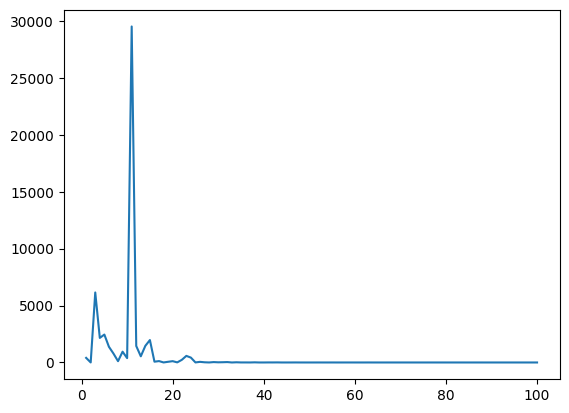

In [652]:
import matplotlib.pyplot as plt
import numpy as np
index = np.arange(1,len(losses)+1)
plt.plot(index[:100],losses[:100])

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи:
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.2.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами


In [653]:
class MSELoss:
  def forward(self, y_pred, y_true):
    # <реализовать логику MSE>
    return torch.mean((y_pred - y_true) ** 2)

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true) / y_pred.shape[0] # df/dy^

2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными.

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [654]:
class Neuron:
  def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
    self.weights = torch.randn(n_inputs,1)
    self.bias = torch.randn(1)
    pass

  def forward(self, inputs):
    self.inputs = inputs
    # <реализовать логику нейрона>
    return torch.matmul(inputs, self.weights) + self.bias

  def backward(self, dvalue):
    # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
    self.dinputs = torch.matmul(dvalue, self.weights.T)
    self.dweights = torch.matmul(self.inputs.T, dvalue) # df/dW
    self.dbias = torch.sum(dvalue) # df/db

2.4.2.3 Допишите цикл для настройки весов нейрона

In [655]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
X = torch.tensor(X, dtype=torch.float32) # <преобразуйте массивы numpy в тензоры torch с типом torch.float32
y = torch.tensor(y, dtype=torch.float32).view(-1, 1) # <преобразуйте массивы numpy в тензоры torch с типом torch.float32

In [656]:
print("Размерность X:", X.shape)
print("Размерность y:", y.shape)

Размерность X: torch.Size([100, 4])
Размерность y: torch.Size([100, 1])


In [657]:
n_inputs = X.shape[1] # <размерность элемента выборки >
learning_rate = 0.01 #  скорость обучения
n_epoch = 1000 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()
losses = []

for epoch in range(n_epoch):
    # forward pass
    y_pred = neuron.forward(X) # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    neuron.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.weights -= learning_rate * neuron.dweights
    neuron.bias -= learning_rate * neuron.dbias

neuron.weights

tensor([[54.9909],
        [37.0224],
        [66.6796],
        [47.1971]])

In [658]:
coef

array([54.99109413, 37.0225099 , 66.6792957 , 47.19724985])

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [659]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>

    self.weights = torch.randn(n_features, n_neurons)
    self.biases = torch.randn(n_neurons)
    #pass

  def forward(self, inputs):
    self.inputs = inputs
    # <реализовать логику слоя>
    return torch.matmul(inputs, self.weights) + self.biases

  def backward(self, dvalues):
    self.dweights = torch.matmul(self.inputs.T, dvalues) # df/dW
    self.dbiases = torch.matmul(torch.ones(dvalues.shape[0]), dvalues) # df/db
    self.dinputs = torch.matmul(dvalues, self.weights.T) # df/dX

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

In [660]:
n_inputs = X.shape[1]  # <размерность элемента выборки >
learning_rate = 0.01  #  скорость обучения
n_epoch = 1000  #  количество эпох

layer = Linear(n_inputs, 1)
loss = MSELoss()

losses = []

for epoch in range(n_epoch):
    # forward pass
    y_pred = layer.forward(X)  # <прогон через нейрон>
    curr_loss = loss.forward(y_pred, y)  # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred, y)
    layer.backward(loss.dinput)

    # <шаг оптимизации для весов (weights и bias) нейрона>
    layer.weights -= learning_rate * layer.dweights
    layer.biases -= learning_rate * layer.dbiases

layer.weights

tensor([[54.9909],
        [37.0224],
        [66.6796],
        [47.1971]])

In [661]:
coef

array([54.99109413, 37.0225099 , 66.6792957 , 47.19724985])

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [662]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

In [663]:
class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output

  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0

In [664]:
# создание компонентов сети
fc1 = Linear(X.shape[1], 10)
relu1 = Activation_ReLU()
fc2 = Linear(10, 1)
n_epoch = 2001
loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(n_epoch):
  # <forward pass>
  # fc1 > relu1 > fc2 > loss
  y_pred = fc2.forward(relu1.forward(fc1.forward(X)))

  data_loss = loss.forward(y_pred, y) # <прогон через функцию потерь>

  if epoch % 200 == 0:
    print(f'epoch {epoch} mean loss {data_loss}')
    ys.append(y_pred)

  # <backprop>
  # loss > fc2 > relu1 > fc1
  loss.backward(y_pred, y)
  fc2.backward(loss.dinput)
  relu1.backward(fc2.dinputs)
  fc1.backward(relu1.dinputs)

  # <шаг оптимизации для fc1>
  fc1.weights -= lr * fc1.dweights
  fc1.biases -= lr * fc1.dbiases

  # <шаг оптимизации для fc2>
  fc2.weights -= lr * fc2.dweights
  fc2.biases -= lr * fc2.dbiases

epoch 0 mean loss 2.849942922592163
epoch 200 mean loss 0.02390153892338276
epoch 400 mean loss 0.018847139552235603
epoch 600 mean loss 0.015395130030810833
epoch 800 mean loss 0.01258070208132267
epoch 1000 mean loss 0.010927312076091766
epoch 1200 mean loss 0.009897354058921337
epoch 1400 mean loss 0.009104591794312
epoch 1600 mean loss 0.00851939246058464
epoch 1800 mean loss 0.008045787923038006
epoch 2000 mean loss 0.0076650334522128105


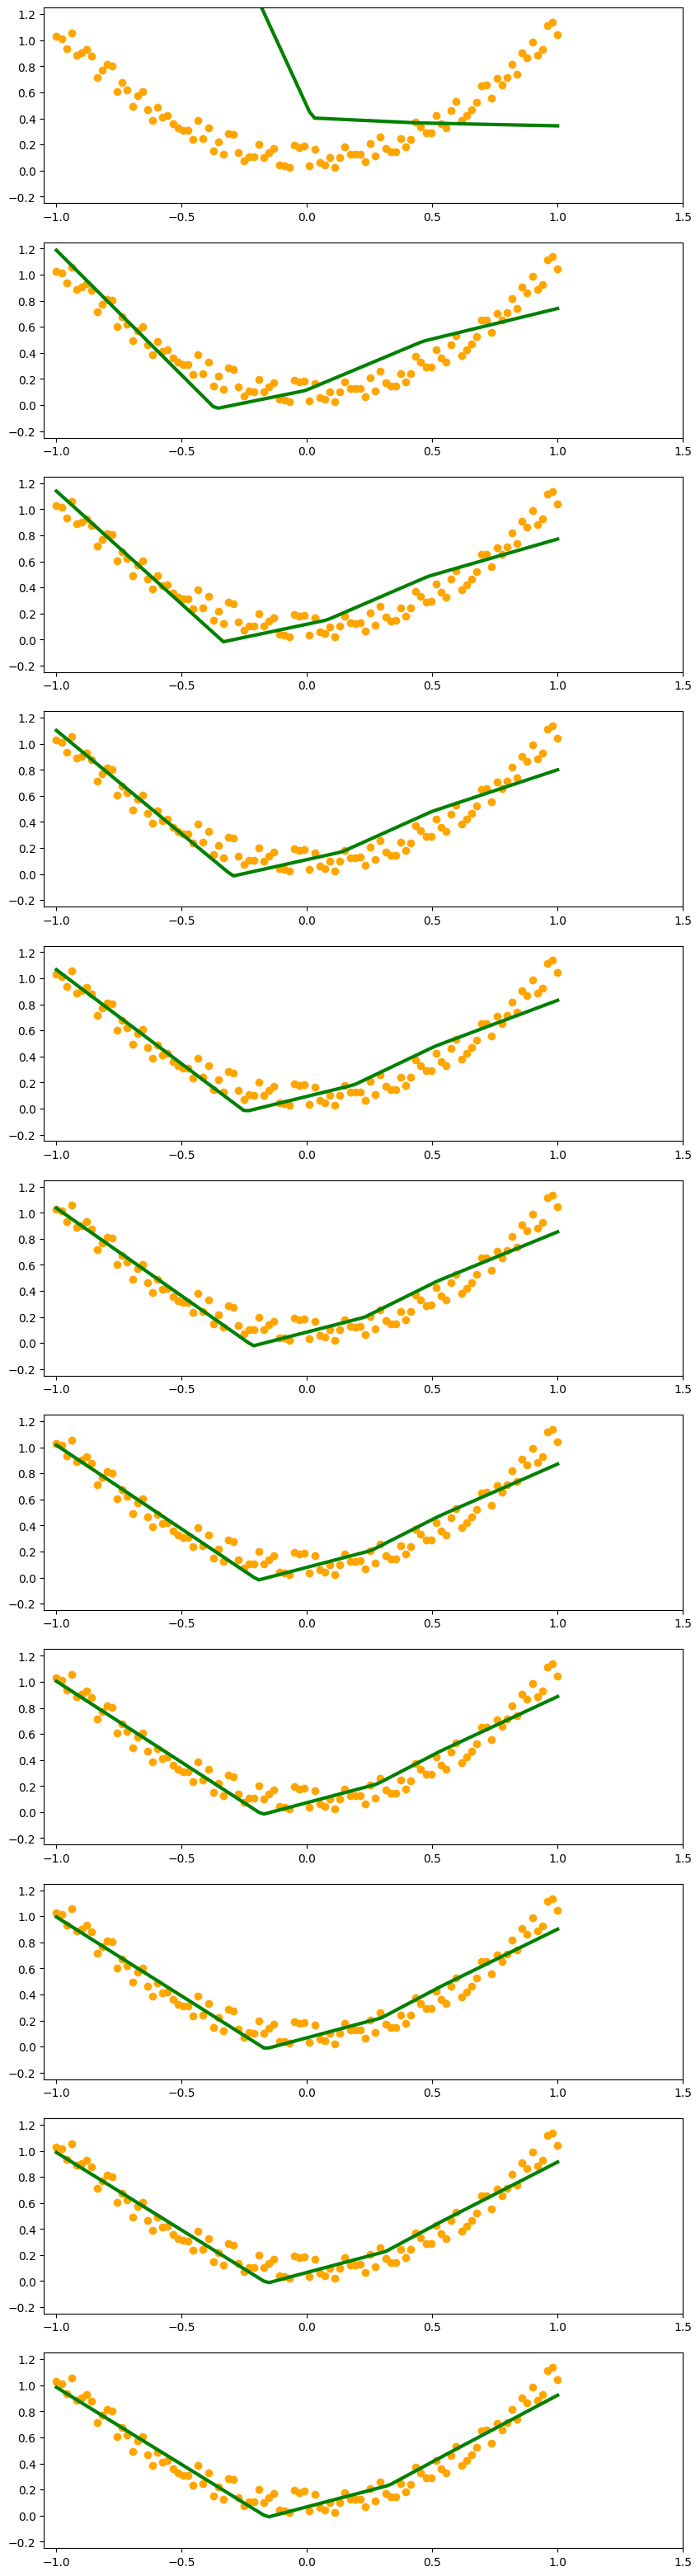

In [665]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)